In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
# collect data and transfer into numpy array using opencv

In [4]:
import cv2 as cv

In [5]:
path='data'

In [6]:
labels=['without_mask','with_mask']

In [7]:
x=[]
y=[]

In [8]:
for names in os.listdir(path):
    indx=labels.index(names)
    for image in os.listdir(os.path.join(path,names)):
        img_path=os.path.join(path,names,image)
        img=cv.imread(img_path)
        resized=cv.resize(img,(128,128))
        x.append(resized)
        y.append(indx)
        
    

In [9]:
# checking if both lists have the same lenght
len(x),len(y)

(2614, 2614)

In [10]:
# converting to numpy array
x=np.array(x)
y=np.array(y)

In [11]:
# scaling the x values for better accuracy
x=x/255

In [12]:
x.max()

1.0

In [13]:
x.shape,y.shape

((2614, 128, 128, 3), (2614,))

In [14]:
# seeing the images at random
import random

Text(0.5, 0, '0')

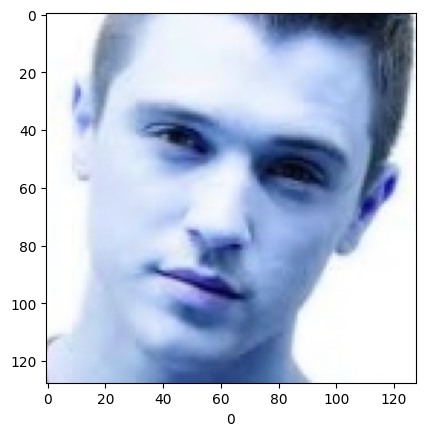

In [15]:
index=random.randint(0,2500)
plt.imshow(x[index])
plt.xlabel(y[index])

In [16]:
# divide the data in training data and testing data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)

In [20]:
x_train.shape,y_train.shape

((2221, 128, 128, 3), (2221,))

In [21]:
x_train.max(),y_train.shape

(1.0, (2221,))

# creating the cnn model

In [27]:
model=keras.Sequential()
# cnn
model.add(keras.layers.Conv2D(45,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPool2D())

model.add(keras.layers.Conv2D(30,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D())

# flattening 
model.add(keras.layers.Flatten())
# deep nn
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(2,activation='softmax'))

In [28]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# training the model

In [29]:
model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
70/70 [==============================] - 49s 624ms/step - loss: 0.4323 - accuracy: 0.8055 - val_loss: 0.2242 - val_accuracy: 0.9109
Epoch 2/5
70/70 [==============================] - 43s 615ms/step - loss: 0.2039 - accuracy: 0.9271 - val_loss: 0.2137 - val_accuracy: 0.9160
Epoch 3/5
70/70 [==============================] - 44s 624ms/step - loss: 0.1477 - accuracy: 0.9442 - val_loss: 0.1274 - val_accuracy: 0.9618
Epoch 4/5
70/70 [==============================] - 44s 624ms/step - loss: 0.1345 - accuracy: 0.9518 - val_loss: 0.1280 - val_accuracy: 0.9567
Epoch 5/5
70/70 [==============================] - 44s 632ms/step - loss: 0.1004 - accuracy: 0.9662 - val_loss: 0.1519 - val_accuracy: 0.9517


In [30]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 2s 143ms/step - loss: 0.1519 - accuracy: 0.9517


[0.15186859667301178, 0.9516539573669434]

In [32]:
def get_predictions(y):
    l=[]
    for i in y:
        val=np.argmax(i)
        if val==0:
            l.append('no mask')
        else:
            l.append('mask')
    return l
#         i=i[0]
#         if i>=0.5:
#             l.append('mask')
#         else:
#             l.append('no mask')
#     return l[0]

In [31]:
y_p=model.predict(x_test)
y_p

13/13 [==============================] - 2s 145ms/step


array([[1.12221114e-01, 8.87778938e-01],
       [2.67440220e-03, 9.97325540e-01],
       [9.97858942e-01, 2.14108545e-03],
       [9.69881177e-01, 3.01188156e-02],
       [9.85053599e-01, 1.49464197e-02],
       [9.97696579e-01, 2.30345014e-03],
       [1.20588098e-04, 9.99879360e-01],
       [2.42830291e-02, 9.75717008e-01],
       [9.23159659e-01, 7.68402740e-02],
       [2.50935644e-01, 7.49064326e-01],
       [1.59590054e-04, 9.99840379e-01],
       [9.96743500e-01, 3.25649302e-03],
       [8.11344564e-01, 1.88655511e-01],
       [8.88837203e-02, 9.11116242e-01],
       [6.72490057e-03, 9.93275166e-01],
       [9.94063437e-01, 5.93656255e-03],
       [9.99188721e-01, 8.11335107e-04],
       [9.95841205e-01, 4.15881258e-03],
       [9.90870655e-01, 9.12935939e-03],
       [1.61334239e-02, 9.83866572e-01],
       [1.81798525e-02, 9.81820226e-01],
       [9.99868631e-01, 1.31333625e-04],
       [4.59884666e-03, 9.95401144e-01],
       [9.97786641e-01, 2.21329252e-03],
       [9.999531

In [33]:
get_predictions(y_p)[:10]

['mask',
 'mask',
 'no mask',
 'no mask',
 'no mask',
 'no mask',
 'mask',
 'mask',
 'no mask',
 'mask']

In [34]:
y_test[:10]

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 1])

In [35]:
def give_result(img):
    res_img=cv.resize(img,(128,128))
    res_img=res_img/255
    y_p=model.predict(np.expand_dims(res_img,0))
    print(y_p)
    result=get_predictions(y_p)
    return result,y_p.max()

In [36]:
img=cv.imread('mask5.jpg')


In [37]:
give_result(img)

1/1 [==============================] - 0s 85ms/step
[[0.546566   0.45343396]]


(['no mask'], 0.546566)

In [38]:
img=cv.imread('nomask.jpg')

In [39]:
give_result(img)

1/1 [==============================] - 0s 40ms/step
[[0.09294673 0.90705323]]


(['mask'], 0.90705323)

In [42]:
image=cv.imread('myno.jpg')
give_result(image)

1/1 [==============================] - 0s 34ms/step
[[0.49266174 0.5073383 ]]


(['mask'], 0.5073383)

# realtime detection

In [46]:
face_cascade=cv.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

In [59]:
cap=cv.VideoCapture(0)
while True:
    try:
        _,frame=cap.read()
        gray=cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
        faces=face_cascade.detectMultiScale(gray,1.1,4)
        x,y,w,h=faces[0]
        label,pro=give_result(frame)
        cv.putText(frame,f"{label} {round(pro*100,2)}%",(20,20),cv.FONT_HERSHEY_COMPLEX_SMALL,1,(0,0,255),1,cv.LINE_AA)
        cv.rectangle(frame,(x,y),(x+h,y+h),(0,255,0),1,cv.LINE_AA)
    except:
        label,pro=give_result(frame)
        cv.putText(frame,f"{label} {round(pro*100,2)}%",(20,20),cv.FONT_HERSHEY_COMPLEX_SMALL,1,(0,0,255),1,cv.LINE_AA)
    if cv.waitKey(1)==27:
        break
    
    cv.imshow('frame',frame)
    
    
cap.release()
cv.destroyAllWindows()

1/1 [==============================] - 0s 37ms/step
[[0.98395073 0.01604929]]
1/1 [==============================] - 0s 41ms/step
[[0.9640703  0.03592972]]
1/1 [==============================] - 0s 53ms/step
[[0.6222712  0.37772885]]
1/1 [==============================] - 0s 35ms/step
[[0.64008945 0.35991058]]
1/1 [==============================] - 0s 35ms/step
[[0.69055605 0.30944392]]
1/1 [==============================] - 0s 34ms/step
[[0.5027323 0.4972677]]
1/1 [==============================] - 0s 36ms/step
[[0.75857913 0.24142084]]
1/1 [==============================] - 0s 40ms/step
[[0.52732205 0.47267795]]
1/1 [==============================] - 0s 43ms/step
[[0.7285661 0.2714339]]
1/1 [==============================] - 0s 35ms/step
[[0.7398095  0.26019052]]
1/1 [==============================] - 0s 37ms/step
[[0.71440065 0.28559938]]
1/1 [==============================] - 0s 36ms/step
[[0.7319576 0.2680424]]
1/1 [==============================] - 0s 34ms/step
[[0.5768135  0.423

1/1 [==============================] - 0s 38ms/step
[[0.57997316 0.42002678]]
1/1 [==============================] - 0s 34ms/step
[[0.566948 0.433052]]
1/1 [==============================] - 0s 45ms/step
[[0.49567914 0.5043209 ]]
1/1 [==============================] - 0s 34ms/step
[[0.4615192  0.53848076]]
1/1 [==============================] - 0s 35ms/step
[[0.43712544 0.5628746 ]]
1/1 [==============================] - 0s 35ms/step
[[0.4747592  0.52524084]]
1/1 [==============================] - 0s 34ms/step
[[0.48763737 0.5123627 ]]
1/1 [==============================] - 0s 34ms/step
[[0.47459143 0.5254086 ]]
1/1 [==============================] - 0s 36ms/step
[[0.47543707 0.5245629 ]]
1/1 [==============================] - 0s 33ms/step
[[0.46776658 0.5322335 ]]
1/1 [==============================] - 0s 32ms/step
[[0.4535382 0.5464619]]
1/1 [==============================] - 0s 33ms/step
[[0.3951219 0.6048781]]
1/1 [==============================] - 0s 34ms/step
[[0.33913714 0.66086

In [50]:
model.save('face_mask_model.h5')

In [51]:
import pickle

In [53]:
with open('face_mask_model.pickle','wb') as f:
    pickle.dump(model,f)
    f.close()